In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt

#required resources; download once
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

#nltk.download('punkt_tab')
#nltk.download('averaged_perceptron_tagger_eng')

Targeted column name: content


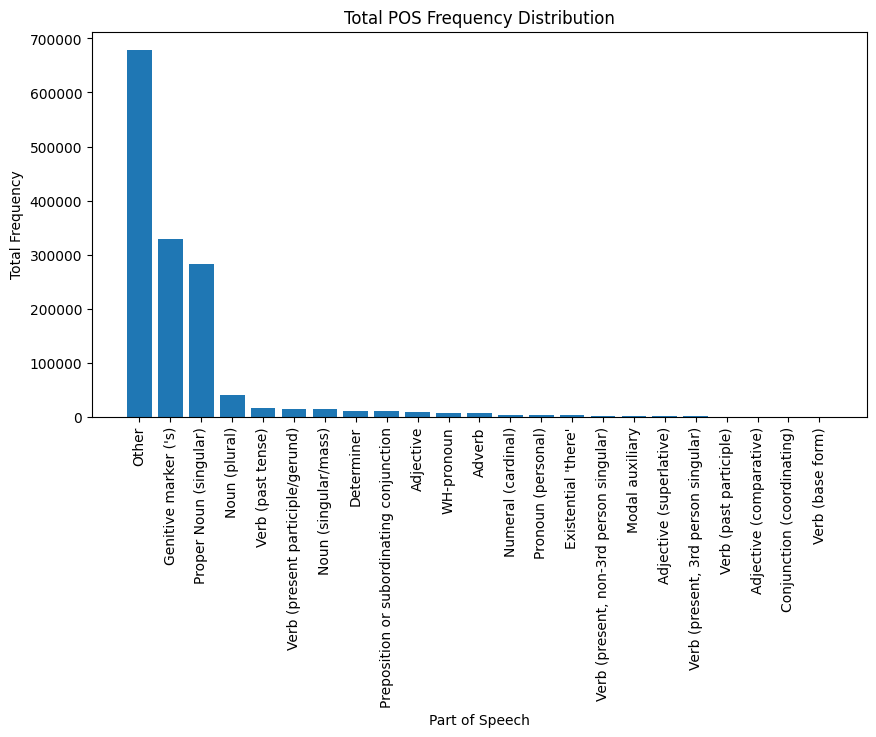

In [11]:
df = pd.read_csv('data/995,000_row_tokenized.csv', nrows=1000)

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")


# POS Mapping Dictionary
pos_mapping = {
    "CC": "Conjunction (coordinating)", "CD": "Numeral (cardinal)", "DT": "Determiner",
    "EX": "Existential 'there'", "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective", "JJR": "Adjective (comparative)", "JJS": "Adjective (superlative)",
    "LS": "List item marker", "MD": "Modal auxiliary", "NN": "Noun (singular/mass)",
    "NNS": "Noun (plural)", "NNP": "Proper Noun (singular)", "NNPS": "Proper Noun (plural)",
    "PDT": "Pre-determiner", "POS": "Genitive marker ('s)", "PRP": "Pronoun (personal)",
    "PRP$": "Pronoun (possessive)", "RB": "Adverb", "RBR": "Adverb (comparative)",
    "RBS": "Adverb (superlative)", "RP": "Particle", "TO": "To (preposition/infinitive marker)",
    "UH": "Interjection", "VB": "Verb (base form)", "VBD": "Verb (past tense)",
    "VBG": "Verb (present participle/gerund)", "VBN": "Verb (past participle)",
    "VBP": "Verb (present, non-3rd person singular)", "VBZ": "Verb (present, 3rd person singular)",
    "WDT": "WH-determiner", "WP": "WH-pronoun", "WRB": "WH-adverb"
}


# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()

In [3]:
df = pd.read_csv('data/995,000_rows.csv', nrows=10)
print(df.head())

   Unnamed: 0         id               domain        type  \
0         732  7444726.0   nationalreview.com   political   
1        1348  6213642.0    beforeitsnews.com        fake   
2        7119  3867639.0     dailycurrant.com      satire   
3        1518  9560791.0          nytimes.com    reliable   
4        9345  2059625.0  infiniteunknown.net  conspiracy   

                                                 url  \
0  http://www.nationalreview.com/node/152734/%E2%...   
1  http://beforeitsnews.com/economy/2012/06/the-c...   
2  http://dailycurrant.com/2016/01/18/man-awoken-...   
3  https://query.nytimes.com/gst/fullpage.html?re...   
4  http://www.infiniteunknown.net/2011/09/14/100-...   

                                             content  \
0  Plus one article on Google Plus\n\n(Thanks to ...   
1  The Cost Of The Best Senate Banking Committee ...   
2  Man Awoken From 27-Year Coma Commits Suicide A...   
3  WHEN Julia Geist was asked to draw a picture o...   
4  – 100 Compile

In [5]:
# Step 1: Read the CSV file
print("Starting to read the CSV file...")
df = pd.read_csv('data/995,000_rows.csv')
print("Successfully read the CSV file!")

# Step 2: Filter the DataFrame
print("Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...")
filtered_df = df[df['type'].isin(['fake', 'reliable'])]
print("Filtering complete! The filtered DataFrame contains", len(filtered_df), "rows.")

# Step 3: Save the filtered DataFrame to a new CSV file
print("Saving the filtered DataFrame to 'filtered_data.csv'...")
filtered_df.to_csv('filtered_data.csv', index=False)
print("Filtered data saved to 'filtered_data.csv'!")

# Final Step: Notify progress completion
print("All steps completed successfully.")


Starting to read the CSV file...


C:\Users\bathy\AppData\Local\Temp\ipykernel_3728\250707239.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/995,000_rows.csv')


Successfully read the CSV file!
Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...
Filtering complete! The filtered DataFrame contains 323447 rows.
Saving the filtered DataFrame to 'filtered_data.csv'...
Filtered data saved to 'filtered_data.csv'!
All steps completed successfully.


In [8]:
# Step 1: Read the CSV file
print("Starting to read the CSV file...")
df = pd.read_csv('data/995,000_rows.csv')
print("Successfully read the CSV file!")

# Step 2: Filter the DataFrame
print("Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...")
filtered_df = df[df['type'].isin(['fake'])]
print("Filtering complete! The filtered DataFrame contains", len(filtered_df), "rows.")

# Step 3: Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('fake_data.csv', index=False)
print("Filtered data saved to 'filtered_data.csv'!")

# Final Step: Notify progress completion
print("All steps completed successfully.")

Starting to read the CSV file...


C:\Users\bathy\AppData\Local\Temp\ipykernel_14472\732388677.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/995,000_rows.csv')


Successfully read the CSV file!
Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...
Filtering complete! The filtered DataFrame contains 104883 rows.
Filtered data saved to 'filtered_data.csv'!
All steps completed successfully.


Targeted column name: content


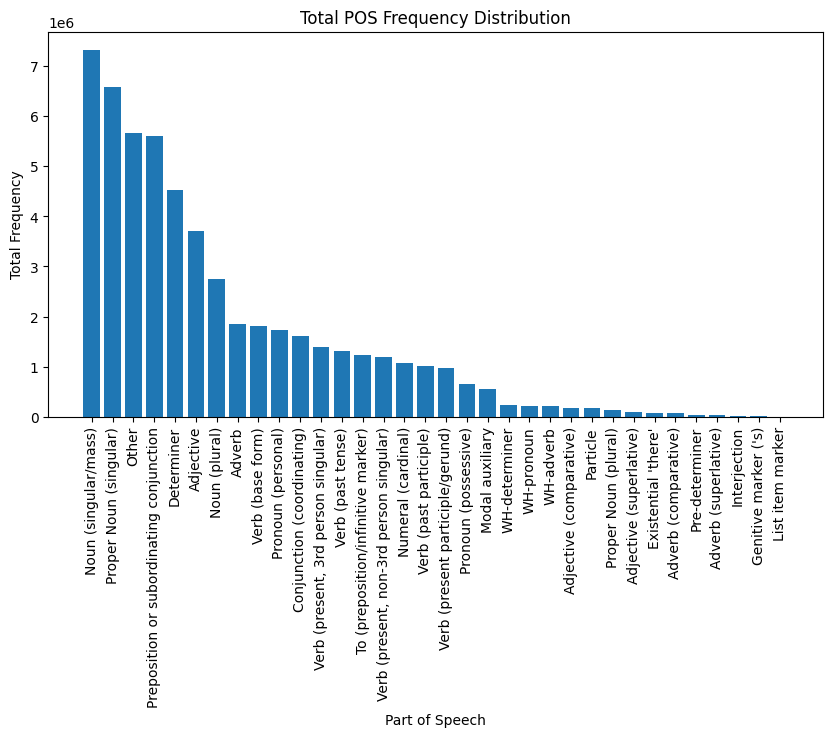

In [12]:
df = pd.read_csv('fake_data.csv')

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")


# POS Mapping Dictionary
pos_mapping = {
    "CC": "Conjunction (coordinating)", "CD": "Numeral (cardinal)", "DT": "Determiner",
    "EX": "Existential 'there'", "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective", "JJR": "Adjective (comparative)", "JJS": "Adjective (superlative)",
    "LS": "List item marker", "MD": "Modal auxiliary", "NN": "Noun (singular/mass)",
    "NNS": "Noun (plural)", "NNP": "Proper Noun (singular)", "NNPS": "Proper Noun (plural)",
    "PDT": "Pre-determiner", "POS": "Genitive marker ('s)", "PRP": "Pronoun (personal)",
    "PRP$": "Pronoun (possessive)", "RB": "Adverb", "RBR": "Adverb (comparative)",
    "RBS": "Adverb (superlative)", "RP": "Particle", "TO": "To (preposition/infinitive marker)",
    "UH": "Interjection", "VB": "Verb (base form)", "VBD": "Verb (past tense)",
    "VBG": "Verb (present participle/gerund)", "VBN": "Verb (past participle)",
    "VBP": "Verb (present, non-3rd person singular)", "VBZ": "Verb (present, 3rd person singular)",
    "WDT": "WH-determiner", "WP": "WH-pronoun", "WRB": "WH-adverb"
}


# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis_fake.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()

In [10]:
# Step 1: Read the CSV file
print("Starting to read the CSV file...")
df = pd.read_csv('data/995,000_rows.csv')
print("Successfully read the CSV file!")

# Step 2: Filter the DataFrame
print("Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...")
filtered_df = df[df['type'].isin(['reliable'])]
print("Filtering complete! The filtered DataFrame contains", len(filtered_df), "rows.")

# Step 3: Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('reliable_data.csv', index=False)
print("Filtered data saved to 'filtered_data.csv'!")

# Final Step: Notify progress completion
print("All steps completed successfully.")

Starting to read the CSV file...


C:\Users\bathy\AppData\Local\Temp\ipykernel_14472\2815564994.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/995,000_rows.csv')


Successfully read the CSV file!
Filtering the DataFrame to include only rows where the 'type' column is 'fake' or 'reliable'...
Filtering complete! The filtered DataFrame contains 218564 rows.
Filtered data saved to 'filtered_data.csv'!
All steps completed successfully.


Targeted column name: content


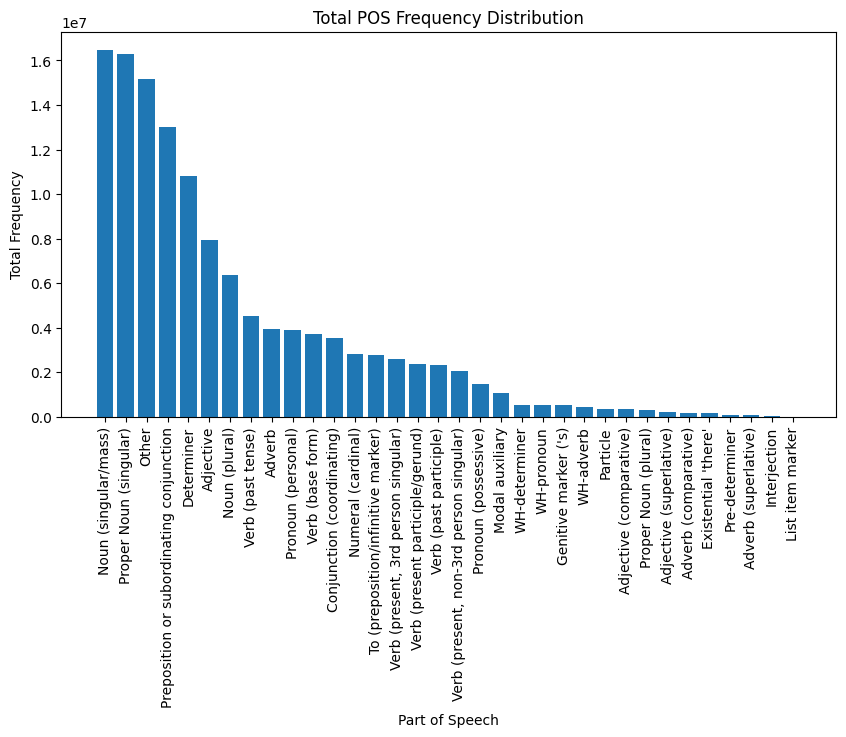

In [ ]:
df = pd.read_csv('reliable_data.csv')

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")


# POS Mapping Dictionary
pos_mapping = {
    "CC": "Conjunction (coordinating)", "CD": "Numeral (cardinal)", "DT": "Determiner",
    "EX": "Existential 'there'", "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective", "JJR": "Adjective (comparative)", "JJS": "Adjective (superlative)",
    "LS": "List item marker", "MD": "Modal auxiliary", "NN": "Noun (singular/mass)",
    "NNS": "Noun (plural)", "NNP": "Proper Noun (singular)", "NNPS": "Proper Noun (plural)",
    "PDT": "Pre-determiner", "POS": "Genitive marker ('s)", "PRP": "Pronoun (personal)",
    "PRP$": "Pronoun (possessive)", "RB": "Adverb", "RBR": "Adverb (comparative)",
    "RBS": "Adverb (superlative)", "RP": "Particle", "TO": "To (preposition/infinitive marker)",
    "UH": "Interjection", "VB": "Verb (base form)", "VBD": "Verb (past tense)",
    "VBG": "Verb (present participle/gerund)", "VBN": "Verb (past participle)",
    "VBP": "Verb (present, non-3rd person singular)", "VBZ": "Verb (present, 3rd person singular)",
    "WDT": "WH-determiner", "WP": "WH-pronoun", "WRB": "WH-adverb"
}


# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis_reliable.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()

In [4]:
df = pd.read_csv('data/filtered_data.csv', nrows=10) ## 323447 total
print(df.head())

   Unnamed: 0         id             domain      type  \
0        1348  6213642.0  beforeitsnews.com      fake   
1        1518  9560791.0        nytimes.com  reliable   
2        3732  8018634.0     online.wsj.com  reliable   
3        7063  8143062.0   www.politico.com  reliable   
4        5564  6383950.0  beforeitsnews.com      fake   

                                                 url  \
0  http://beforeitsnews.com/economy/2012/06/the-c...   
1  https://query.nytimes.com/gst/fullpage.html?re...   
2  http://online.wsj.com/articles/shift-options-1...   
3  http://www.politico.com/story/2016/11/chuck-sc...   
4  http://beforeitsnews.com/opinion-conservative/...   

                                             content  \
0  The Cost Of The Best Senate Banking Committee ...   
1  WHEN Julia Geist was asked to draw a picture o...   
2  IF YOU SPEND the majority of your waking hours...   
3  \n"We say to our Republicans who want to priva...   
4  (Before It's News)\n\nGovernor Palin 

Targeted column name: content


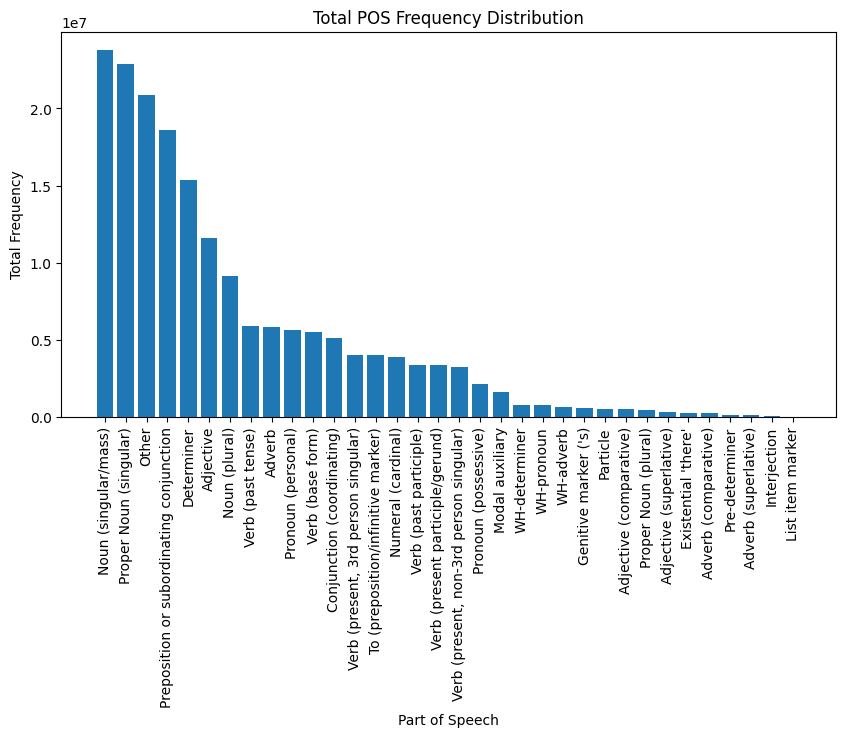

In [7]:
df = pd.read_csv('data/filtered_data.csv')

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")


# POS Mapping Dictionary
pos_mapping = {
    "CC": "Conjunction (coordinating)", "CD": "Numeral (cardinal)", "DT": "Determiner",
    "EX": "Existential 'there'", "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective", "JJR": "Adjective (comparative)", "JJS": "Adjective (superlative)",
    "LS": "List item marker", "MD": "Modal auxiliary", "NN": "Noun (singular/mass)",
    "NNS": "Noun (plural)", "NNP": "Proper Noun (singular)", "NNPS": "Proper Noun (plural)",
    "PDT": "Pre-determiner", "POS": "Genitive marker ('s)", "PRP": "Pronoun (personal)",
    "PRP$": "Pronoun (possessive)", "RB": "Adverb", "RBR": "Adverb (comparative)",
    "RBS": "Adverb (superlative)", "RP": "Particle", "TO": "To (preposition/infinitive marker)",
    "UH": "Interjection", "VB": "Verb (base form)", "VBD": "Verb (past tense)",
    "VBG": "Verb (present participle/gerund)", "VBN": "Verb (past participle)",
    "VBP": "Verb (present, non-3rd person singular)", "VBZ": "Verb (present, 3rd person singular)",
    "WDT": "WH-determiner", "WP": "WH-pronoun", "WRB": "WH-adverb"
}


# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import spacy
from collections import Counter
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'spacy'

Targeted column name: content


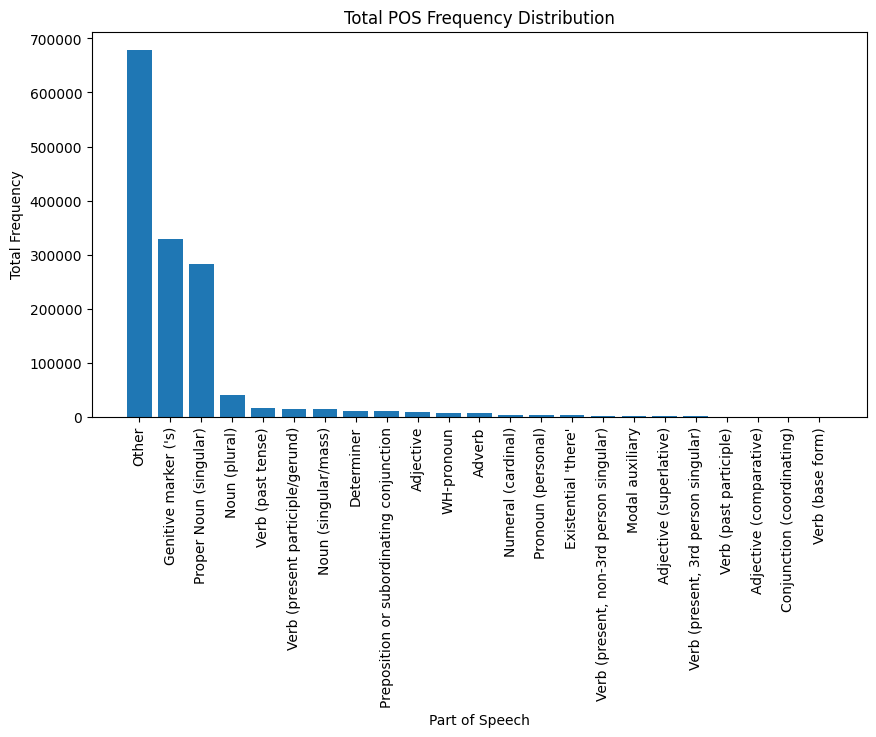

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the data
df = pd.read_csv('data/995,000_row_tokenized.csv', nrows=1000)

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("something's wrong!")

# POS Mapping Dictionary
pos_mapping = {
    "ADJ": "Adjective", "ADP": "Adposition", "ADV": "Adverb", "AUX": "Auxiliary",
    "CONJ": "Conjunction", "CCONJ": "Coordinating conjunction", "DET": "Determiner",
    "INTJ": "Interjection", "NOUN": "Noun", "NUM": "Numeral", "PART": "Particle",
    "PRON": "Pronoun", "PROPN": "Proper noun", "PUNCT": "Punctuation", "SCONJ": "Subordinating conjunction",
    "SYM": "Symbol", "VERB": "Verb", "X": "Other"
}

# Function to process each row
def process_text(text):
    doc = nlp(text)
    readable_tags = [pos_mapping.get(token.pos_, "Other") for token in doc]
    pos_counts = Counter(readable_tags)
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
#print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=90)
plt.show()